In [1]:
import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


<Axes: xlabel='expected_hours', ylabel='price'>

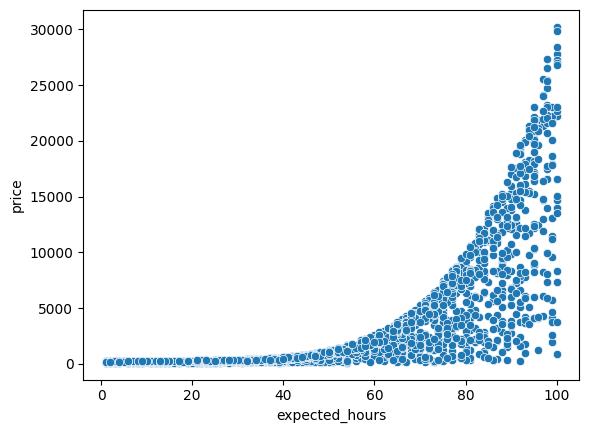

In [3]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", data = dados)

<Axes: xlabel='expected_hours', ylabel='price'>

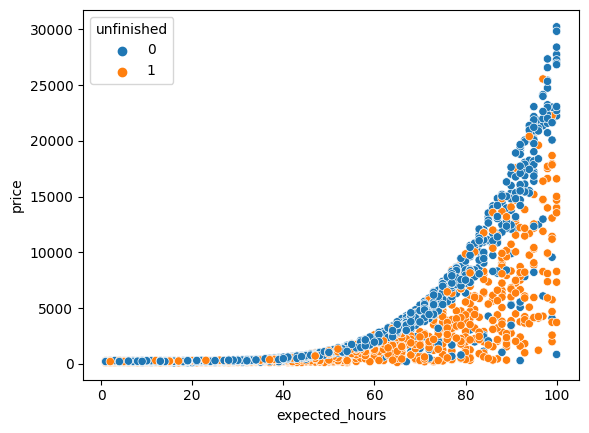

In [7]:
sns.scatterplot(x="expected_hours", y="price", hue="unfinished", data = dados)

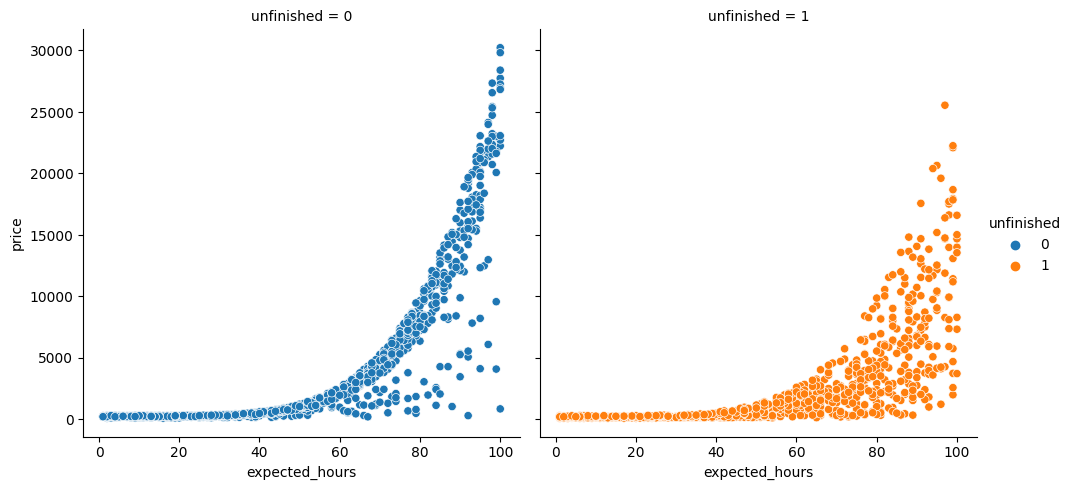

In [8]:
sns.relplot(x="expected_hours", y="price", hue="unfinished", col="unfinished", data = dados)

In [9]:
x = dados[['expected_hours', 'price']]
y = dados['unfinished']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.81%


/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
import numpy as np
baseline = np.ones(540)
acuracia = accuracy_score(teste_y, baseline) * 100

In [14]:
acuracia

47.96296296296296

<Axes: xlabel='expected_hours', ylabel='price'>

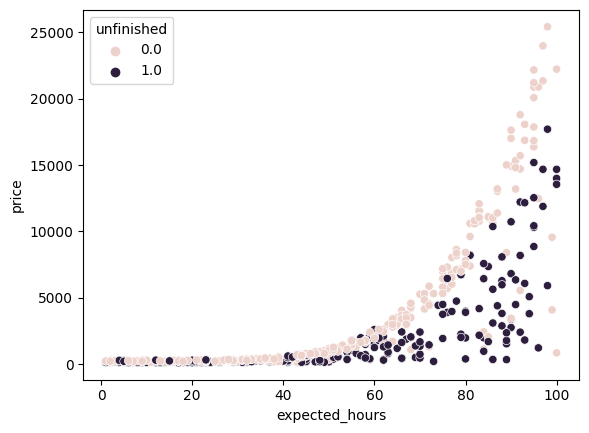

In [16]:
sns.scatterplot(x="expected_hours", y="price", hue=teste_y, data = dados)

In [17]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()
y_min = teste_x.price.min()
y_max = teste_x.price.max()
print(x_min, x_max, y_min, y_max)

1 100 100 25427


In [21]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [23]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [25]:
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.517373e+04],
       [9.802000e+01, 2.517373e+04],
       [9.901000e+01, 2.517373e+04]])

In [35]:
Z = modelo.predict(points)
Z = Z.reshape(xx.shape)

/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


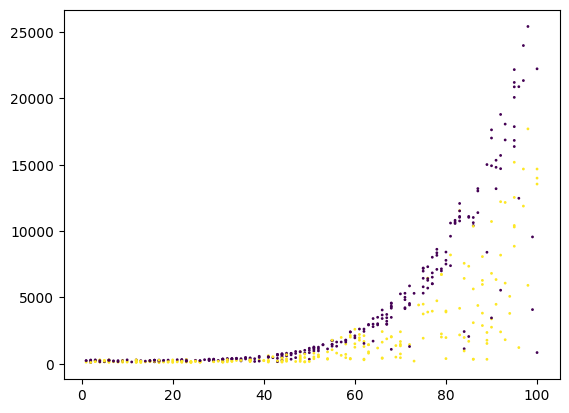

In [28]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1)

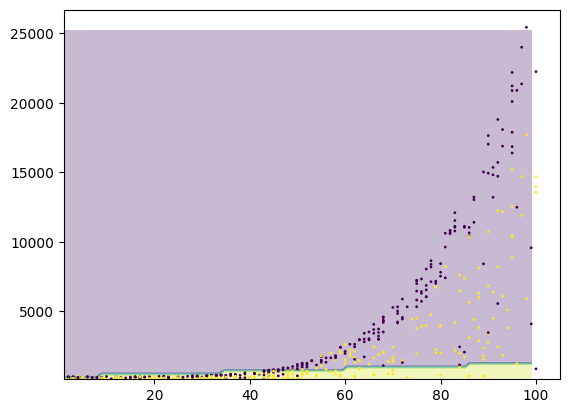

In [36]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1)